<a href="https://colab.research.google.com/github/saurabhsingh1411/Deep_Learning_Projects/blob/main/NLP/Classifying_IMDB_reviews_data_(Embedding_%2B_MLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [3]:
import tensorflow_datasets as tfds

imdb,info=tfds.load('imdb_reviews',with_info=True,as_supervised=True)


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6PX41A/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6PX41A/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6PX41A/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [4]:
imdb

{'test': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 'train': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 'unsupervised': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>}

In [5]:
train_data,test_data=imdb['train'],imdb['test']

In [6]:
train_data

<PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>

In [10]:
import numpy as np

# train_sentence=[]
# train_label=[]

# for train_sentence ,train_label in train_data: 
#   train_sentence.append(str(train_sentence.numpy()))
#   train_label.append(str(train_label.numpy()))

train_sentences = []
train_labels = []
    
for sentence,label in train_data:
        train_sentences.append(str(sentence.numpy()))
        train_labels.append(label.numpy())
        
train_labels = np.array(train_labels)
    

In [13]:
test_sentences = []
test_labels = []
    
for sentence,label in test_data:
        test_sentences.append(str(sentence.numpy()))
        test_labels.append(label.numpy())
        
test_labels = np.array(train_labels)

In [16]:
vocab_size=10000
embedding_dim=16
max_length=120
trunc_type='post'
oov_tok='<OOV>'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(train_sentences)
train_padded=pad_sequences(sequences,maxlen=max_length,truncating=trunc_type)

test_seq=tokenizer.texts_to_sequences(test_sentences)
test_padded=pad_sequences(sequences,maxlen=max_length,truncating=trunc_type)

In [17]:
model=tf.keras.Sequential()
from tensorflow.keras import layers

model.add(layers.Embedding(vocab_size,embedding_dim,input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
num_epochs=10

history=model.fit(train_padded,train_labels,epochs=num_epochs,validation_data=(test_padded,test_labels))

Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 0.5699 - accuracy: 0.6648 - val_loss: 0.2074 - val_accuracy: 0.9325
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1863 - accuracy: 0.9348 - val_loss: 0.0481 - val_accuracy: 0.9925
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0357 - accuracy: 0.9917 - val_loss: 0.0075 - val_accuracy: 0.9990
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0062 - accuracy: 0.9992 - val_loss: 7.8073e-04 - val_accuracy: 1.0000
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 6.5615e-04 - accuracy: 1.0000 - val_loss: 2.3642e-04 - val_accuracy: 1.0000
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 2.1822e-04 - accuracy: 1.0000 - val_loss: 1.1928e-04 - val_accuracy: 1.0000
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 1.0866e-04 - accuracy: 1.0000 - val_loss: 7.2716e-05 -

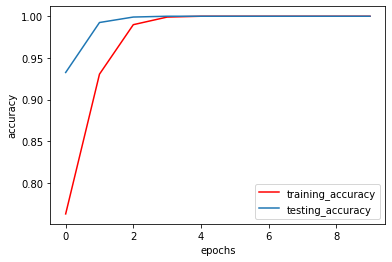

In [25]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))

plt.plot(epochs,acc,'r',label='training_accuracy',)
plt.plot(epochs,val_acc,label='testing_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()